Please find below SMDM Project instructions:

    You have to submit 2 files : 
        Answer Report: In this, you need to submit all the answers to all the questions in a sequential manner. It should include a detailed explanation of the approach used, insights, inferences, all outputs of codes like graphs, tables etc. Your report should not be filled with codes. You will be evaluated based on the business report only. Hence please ensure that your business report is detailed and includes everything apart from code. THE REPORT HAS TO BE STRICTLY SUBMITTED IN A PDF/DOC FORMAT. ANY OTHER FORMAT WILL NOT BE CONSIDERED FOR GRADING. 6 Marks are allotted for the "Quality of Business Report".
        Jupyter Notebook file: This is a must and will be used for reference while evaluating
    Any assignment found copied/ plagiarized with another person will not be graded and marked as zero.
    Please ensure timely submission as a post-deadline assignment will not be accepted.

Problem 1

Wholesale Customers Analysis 

 Problem Statement:

A wholesale distributor operating in different regions of Portugal has information on annual spending of several items in their stores across different regions and channels. The data consists of 440 large retailers’ annual spending on 6 different varieties of products in 3 different regions (Lisbon, Oporto, Other) and across different sales channel (Hotel, Retail).

<h1>
1.1.1 Use methods of descriptive statistics to summarize data. 
    
</h1>


In [1]:
import numpy as np
import pandas as pd
from scipy.stats import f
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
from scipy.stats import ttest_1samp, ttest_ind
from statsmodels.stats.power import ttest_power



In [2]:
df_cust_data = pd.read_csv('Wholesale+Customers+Data.csv')

In [3]:
df_cust_data.describe()

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,220.500000,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,127.161315,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,110.750000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,220.500000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,330.250000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,440.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [4]:
df_cust_data.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185


In [5]:
df_cust_data.tail()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
435,436,Hotel,Other,29703,12051,16027,13135,182,2204
436,437,Hotel,Other,39228,1431,764,4510,93,2346
437,438,Retail,Other,14531,15488,30243,437,14841,1867
438,439,Hotel,Other,10290,1981,2232,1038,168,2125
439,440,Hotel,Other,2787,1698,2510,65,477,52


In [6]:
df_cust_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Buyer/Spender     440 non-null    int64 
 1   Channel           440 non-null    object
 2   Region            440 non-null    object
 3   Fresh             440 non-null    int64 
 4   Milk              440 non-null    int64 
 5   Grocery           440 non-null    int64 
 6   Frozen            440 non-null    int64 
 7   Detergents_Paper  440 non-null    int64 
 8   Delicatessen      440 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 31.1+ KB


In [7]:
df_cust_data.shape

(440, 9)

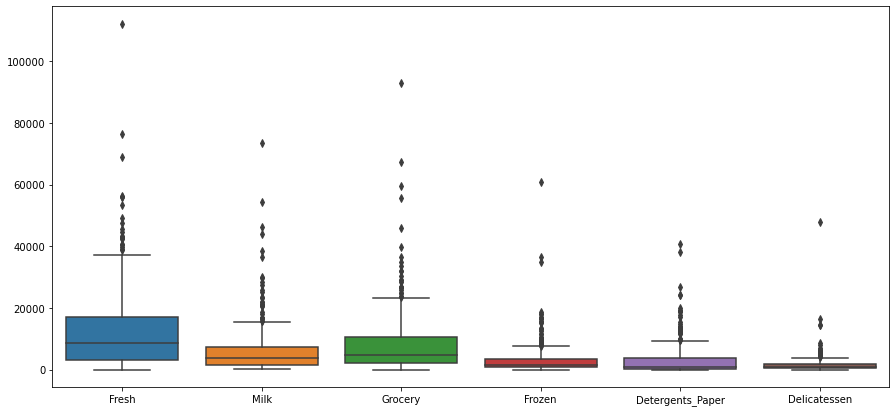

In [8]:
df1 = df_cust_data.drop(columns=['Buyer/Spender'])

plt.figure(figsize=(15,7))
sns.boxplot(data=df1[['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicatessen']] )
plt.show()

<h5>
This wholesale customer dataset contains 440 records and 9 columns. There is 1 index column Buyer/Spender, 2 Categorical columns Channel(Hotel,Retail) and Region(Lisbon,Oporto,Other) then there 6 numerical columns 'Fresh','Milk','Grocery','Frozen','Detergents_Paper' and 'Delicatessen'. 
</h5>

<h1>
1.1.2  Which Region and which Channel spent the most?
    
1.1.3  Which Region and which Channel spent the least?
</h1>

In [9]:
df112 = df_cust_data.groupby(by=["Region"]).sum()
df_reg = df112.drop(columns=['Buyer/Spender'])
df_reg 

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Region,,,,,,
Lisbon,854833,422454,570037,231026,204136,104327
Oporto,464721,239144,433274,190132,173311,54506
Other,3960577,1888759,2495251,930492,890410,512110


In [10]:
df_reg_total = df_reg.copy()
df_reg_total["Total"] = df_reg['Fresh']+df_reg['Milk']+df_reg['Grocery']+df_reg['Frozen']+df_reg['Detergents_Paper']+df_reg['Delicatessen']
df_reg_total

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total
Region,,,,,,,
Lisbon,854833,422454,570037,231026,204136,104327,2386813
Oporto,464721,239144,433274,190132,173311,54506,1555088
Other,3960577,1888759,2495251,930492,890410,512110,10677599


In [11]:


print("The Region that has spent the most is {} and the region that has spent the least is {}".format(df_reg.index[2],df_reg.index[1]))

The Region that has spent the most is Other and the region that has spent the least is Oporto


In [12]:
df112r = df_cust_data.groupby(by=["Channel"]).sum()
df_chan = df112r.drop(columns=['Buyer/Spender'])
df_chan

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Channel,,,,,,
Hotel,4015717,1028614,1180717,1116979,235587,421955
Retail,1264414,1521743,2317845,234671,1032270,248988


In [13]:
df_chan_total = df_chan.copy()
df_chan_total['Total'] = df_chan['Fresh']+df_chan['Milk']+df_chan['Grocery']+df_chan['Frozen']+df_chan['Detergents_Paper']+df_chan['Delicatessen']
df_chan_total                                                                            

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total
Channel,,,,,,,
Hotel,4015717,1028614,1180717,1116979,235587,421955,7999569
Retail,1264414,1521743,2317845,234671,1032270,248988,6619931


In [14]:


print("The Channel that has spent the most is {} and the channel that has spent the least is {}".format(df_chan.index[0],df_chan.index[1]))

The Channel that has spent the most is Hotel and the channel that has spent the least is Retail


<h1>
1.2 There are 6 different varieties of items that are considered. Describe and comment/explain all the varieties across Region and Channel? Provide a detailed justification for your answer.
    </h1>

In [15]:
df_chan_total

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total
Channel,,,,,,,
Hotel,4015717,1028614,1180717,1116979,235587,421955,7999569
Retail,1264414,1521743,2317845,234671,1032270,248988,6619931


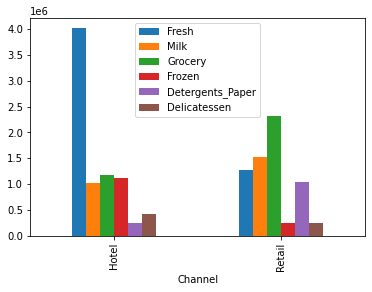

In [16]:
axis = df_chan[["Fresh", "Milk", "Grocery", "Frozen", "Detergents_Paper", "Delicatessen"]].plot(kind="bar")
fig = axis.get_figure()

<h5>
1.The above graph clearly shows that the most spent product in retail category is Grocery products and least spent product in retail category is the Frozen food products.
2.In Hotel category the most spent product is the Fresh products and least spent product is the Detergents_paper
</h5>

In [17]:
df_reg_total

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total
Region,,,,,,,
Lisbon,854833,422454,570037,231026,204136,104327,2386813
Oporto,464721,239144,433274,190132,173311,54506,1555088
Other,3960577,1888759,2495251,930492,890410,512110,10677599


In [18]:
axis = df_region2[["Fresh", "Milk", "Grocery", "Frozen", "Detergents_Paper", "Delicatessen"]].plot(kind="bar")
fig = axis.get_figure()

NameError: name 'df_region2' is not defined

1.From the above graph, we can see that at Lisbon most spent product are Fresh products and the least spent product is Delicatessen
2.At Oporto, the most spent product are Fresh products and least spent products are Delicatessen
3.In other category, the most spent product are Fresh products and least spent product are Delicatessen

<h1>
1.3 On the basis of a descriptive measure of variability, which item shows the most inconsistent behaviour? Which items show the least inconsistent behaviour?
 </h1>

In [ ]:


sns.pairplot(df1)

In [ ]:
df_region2_transposed = df_reg.T
df_region2_transposed

In [ ]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = df_region2_transposed.index
sizes = df_region2_transposed['Lisbon']
explode = (0, 0, 0, 0, 0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Total spending at Lisbon')
plt.show()


In [ ]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = df_region2_transposed.index
sizes = df_region2_transposed['Oporto']
explode = (0, 0, 0, 0, 0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Total spending at Oporto')
plt.show()

In [ ]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = df_region2_transposed.index
sizes = df_region2_transposed['Other']
explode = (0, 0, 0, 0, 0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Total spending at Other locations')
plt.show()

In [ ]:

df_chan_transposed = df_chan.T
df_chan_transposed

In [ ]:

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = df_chan_transposed.index
sizes = df_chan_transposed['Hotel']
explode = (0, 0, 0, 0, 0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Total spending in Hotel category')
plt.show()

In [ ]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = df_chan_transposed.index
sizes = df_chan_transposed['Retail']
explode = (0, 0, 0, 0, 0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Total spending in Retail category')
plt.show()

In [ ]:
axis = df_channel2[["Fresh", "Milk", "Grocery", "Frozen", "Detergents_Paper", "Delicatessen"]].plot(kind="bar",stacked=True)
fig = axis.get_figure()

In [ ]:
axis = df_region2[["Fresh", "Milk", "Grocery", "Frozen", "Detergents_Paper", "Delicatessen"]].plot(kind="bar",stacked=True)
fig = axis.get_figure()

In [ ]:
df13 = pd.concat([df_chan_transposed, df_region2_transposed], join = 'outer', axis = 1)
df13

In [ ]:
#df13['std'] = df13.std(axis=1)
#df13

In [ ]:
#df13['mean'] = df13.mean(axis=1)
#df13

In [ ]:
#df13['coeff_var'] = (df13['std']/df13['mean']) * 100
#df13

In [ ]:
#df13_transposed = df13.T
#df13_transposed

In [ ]:
#df13_transposed.describe()

In [ ]:
df1

In [ ]:
df1_new = df1.drop(columns=['Channel','Region'])
df1_new

In [ ]:
df1_new_transposed = df1_new.T
df1_new_transposed

In [ ]:
df1_new_transposed['std'] = df1_new_transposed.std(axis=1)
df1_new_transposed

In [ ]:
df1_new_transposed['mean'] = df1_new_transposed.mean(axis=1)
df1_new_transposed

In [ ]:
df1_new_transposed['coeff_var'] = (df1_new_transposed['std']/df1_new_transposed['mean'])*100
df1_new_transposed

In [ ]:
df1_new_transposed[['coeff_var']]

<h5>
On the basis of a descriptive measure of variability by looking at the coefficient of variation we can say that  Fresh products show the most inconsistent behaviour and  Delicatessen  shows the least inconsistent behaviour
</h5>

<h1>1.4 Are there any outliers in the data? Back up your answer with a suitable plot/technique with the help of detailed comments.</h1>


In [ ]:
plt.figure(figsize=(15,7))
sns.boxplot(data=df1[['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicatessen']] ,orient = "h",showmeans=True)
plt.show()

<h5>
    From this Boxplot, we can clearly see that all the 6 items have outliers
</h5>

<h1>

1.5 On the basis of your analysis, what are your recommendations for the business? How can your analysis help the business to solve its problem? Answer from the business perspective 
</h1>

<h5>
From this analysis we can conclude that:
(1)When we calculate total, the business spends the most on fresh products accross different channels and different regions, so the company needs to ensure that it is driving the most profit from this food item.
(2)Since the Delicatessen show the least inconsistent behaviour , the business should invest more in this food item because it is less risky
(3)Fresh products require more spending, to cust cost the wholesale distributor can concentrate more on other food items like Milk, Grocery, Frozen, Detergents_Paper and Delicatessen
</h5>

<img src="https://bloximages.newyork1.vip.townnews.com/wvgazettemail.com/content/tncms/assets/v3/editorial/a/42/a425e5f0-b16a-5dce-b39e-5755496d7b8a/59f3703aede79.image.jpg?resize=900%2C588"></img>

<h1>Problem 2

The Student News Service at Clear Mountain State University (CMSU) has decided to gather data about the undergraduate students that attend CMSU. CMSU creates and distributes a survey of 14 questions and receives responses from 62 undergraduates (stored in the Survey data set).

2.1. For this data, construct the following contingency tables (Keep Gender as row variable)

2.1.1. Gender and Major

2.1.2. Gender and Grad Intention

2.1.3. Gender and Employment

2.1.4. Gender and Computer
</h1>


In [ ]:
df_survey = pd.read_csv('Survey-1.csv')

In [ ]:
df_survey

In [ ]:
df_survey.Gender.value_counts()

In [ ]:
df_survey.Major.value_counts()

In [ ]:
df_major = df_survey.groupby(['Gender','Major']).count()

df_major

In [ ]:
df_survey.groupby(['Gender','Grad Intention']).count()

In [ ]:
df_survey.groupby(['Gender','Employment']).count()

In [ ]:
df_survey.groupby(['Gender','Computer']).count()

<h1>
2.2. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

2.2.1. What is the probability that a randomly selected CMSU student will be male?

2.2.2. What is the probability that a randomly selected CMSU student will be female?

</h1>

In [ ]:
Total_CMSU_students = 62
Prob_of_male = 29/Total_CMSU_students
print("The probability that a randomly selected CMSU student will be male is {}".format(Prob_of_male))

In [ ]:
Total_CMSU_students = 62
Prob_of_female = 33/Total_CMSU_students
print("The probability that a randomly selected CMSU student will be female is {}".format(Prob_of_female))

<h1>
2.3. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

2.3.1. Find the conditional probability of different majors among the male students in CMSU.

2.3.2 Find the conditional probability of different majors among the female students of CMSU.

</h1>

In [ ]:
df23 = df_survey[(df_survey['Gender'] == 'Male')]
df231 = df23.groupby(['Major']).count()
df231

In [ ]:
df231_prob = df231[["Gender"]]
df231_prob

In [ ]:
df231_prob['male_prob'] = df231_prob[["Gender"]] / 29
df231_prob

In [ ]:
df232 = df_survey[(df_survey['Gender'] == 'Female')]
df232_major_count = df232.groupby(['Major']).count()
df232_major_count

In [ ]:
df232_prob = df232_major_count[["Gender"]]
df232_prob

In [ ]:
df232_prob['female_prob'] = df232_prob[["Gender"]] / 33
df232_prob

<h1>
2.4. Assume that the sample is a representative of the population of CMSU. Based on the data, answer the following question:

2.4.1. Find the probability That a randomly chosen student is a male and intends to graduate.

2.4.2 Find the probability that a randomly selected student is a female and does NOT have a laptop. 
</h1>

In [ ]:
df241 = df_survey[(df_survey['Gender'] == 'Male') &  (df_survey['Grad Intention'] == 'Yes')]

x = df241.shape[0]
total_students = 62
prob_male_grad = x/total_students
print("Probability that a randomly chosen student is a male and intends to graduate is {}".format(prob_male_grad))

In [ ]:
df241.shape

In [ ]:
df242 = df_survey[(df_survey['Gender'] == 'Female') &  (df_survey['Computer'] != 'Laptop')]
y = df242.shape[0]
prob_female_nolaptop = y/total_students
print("Probability that a randomly chosen student is a female and does not have a laptop is {}".format(prob_female_nolaptop))

In [ ]:
df242.shape

<h1>
2.5. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

2.5.1. Find the probability that a randomly chosen student is a male or has full-time employment?

2.5.2. Find the conditional probability that given a female student is randomly chosen, she is majoring in international business or management.

</h1>

In [ ]:
df251_1 = df_survey[(df_survey['Gender'] == 'Male')]
df251_2 = df_survey[(df_survey['Employment'] == 'Full-Time')]
df251_1.shape

In [ ]:
df251_2.shape

In [ ]:
#df251_3 <- rbind(df251_1, df251_2)

In [ ]:
frames = [df251_1, df251_2]

df251_3 = pd.concat(frames)

In [ ]:
df251_3.shape

In [ ]:
df251_3.drop_duplicates(subset="ID", keep='last', inplace=True)

In [ ]:
df251_3.shape

In [ ]:
z = df251_3.shape[0]
prob_male_or_fullemp = z/total_students
print("Probability that a randomly chosen student is a male or has full time employment is {}".format(prob_male_or_fullemp))

In [ ]:
df252 = df_survey[(df_survey['Gender'] == 'Female') &  ((df_survey['Major'] == 'Management') | (df_survey['Major'] == 'International Business'))]

In [ ]:
df252.shape
a = df252.shape[0]
female_students = 33
male_students = 29
prob_female_and_mgt_or_ib = a/female_students
print("Probability that a randomly chosen student is female and has Major in  Management or International Business {}".format(prob_female_and_mgt_or_ib))

In [ ]:
df252.shape

<h1>
2.6.  Construct a contingency table of Gender and Intent to Graduate at 2 levels (Yes/No). The Undecided students are not considered now and the table is a 2x2 table. Do you think the graduate intention and being female are independent events?

</h1>

In [ ]:
df26 = df_survey.groupby(['Gender','Grad Intention']).count()
df26

In [ ]:
df26_1 = df26.drop(columns=['Age','Class','Major','GPA','Employment','Salary','Social Networking','Satisfaction','Spending','Computer','Text Messages'])
df26_1

In [ ]:
#df26.drop(df26[df26['Grad Intention'] == Undecided].index, inplace = True)
# indexNames = df26[ (df26['ID'] == '13')].index
#df26.drop(indexNames , inplace=True) 
df26_1_transposed = df26_1.T
df26_1_transposed

In [ ]:
data = [{'yes': 17, 'no':3 },
        {'yes':11, 'no': 9}]
df26_2 = pd.DataFrame(data)
df26_2

In [ ]:
df26_2.rename(index={0: "male", 1: "female"})


In [ ]:
df_survey_female = df_survey[(df_survey['Gender'] == 'Female')]
df_survey_female.shape

In [ ]:
33/62

In [ ]:
df_survey_Grad_Intention = df_survey[(df_survey['Grad Intention'] == 'Yes')]
df_survey_Grad_Intention.shape

In [ ]:
28/62

In [ ]:
df_survey_female_int_grad = df_survey[(df_survey['Gender'] == 'Female') &  (df_survey['Grad Intention'] == 'Yes')]
df_survey_female_int_grad.shape

In [ ]:
11/62

In [ ]:
0.532258064516129*0.45161290322580644

<h1>
2.7. Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending, and Text Messages.

Answer the following questions based on the data

2.7.1. If a student is chosen randomly, what is the probability that his/her GPA is less than 3?

2.7.2. Find the conditional probability that a randomly selected male earns 50 or more. Find the conditional probability that a randomly selected female earns 50 or more.
</h1>

In [ ]:
df271 = df_survey[(df_survey['GPA'] < 3.0 )]
b = df271.shape[0]
prob_less_gpa = b/total_students

print("Probability that a randomly chosen student's GPA is less than 3 is  {}".format(prob_less_gpa))

In [ ]:
df271.shape

In [ ]:
17/62

In [ ]:
df272 = df_survey[(df_survey['Gender'] == 'Male') &  (df_survey['Salary'] >= 50)]
c = df272.shape[0]
prob_male_sal_50_abv = c/male_students

print("Probability that a randomly selected male earns more than 50 is  {}".format(prob_male_sal_50_abv))

In [ ]:
df272.shape

In [ ]:
14/29

In [ ]:
df272_f = df_survey[(df_survey['Gender'] == 'Female') &  (df_survey['Salary'] >= 50)]
d = df272_f.shape[0]
prob_female_sal_50_abv = d/female_students

print("Probability that a randomly selected Female earns more than 50 is  {}".format(prob_female_sal_50_abv))

In [ ]:
df272_f.shape

In [ ]:
18/33

In [ ]:
df_survey

<h1>
2.8. Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending, and Text Messages. For each of them comment whether they follow a normal distribution. Write a note summarizing your conclusions for this whole Problem 2.
</h1>

In [ ]:
sns.distplot(df_survey[['GPA']])
plt.title('GPA')

In [ ]:
from scipy.stats import shapiro
from numpy.random import seed
from numpy.random import randn
import numpy as np
from scipy.stats import shapiro

data = df_survey['GPA']

data = np.array(data)
d_mu = np.mean(data)
d_sig = np.std(data)
data = np.random.normal(d_mu,d_sig, 62)
stat, p = shapiro(data)
print('statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('its Gaussian ')
else:
    print('not Gaussian')

In [ ]:
df_survey['GPA'].count()

## shapiro_test.statistic

In [ ]:
shapiro_test.pvalue

In [ ]:
sns.distplot(df_survey[['Salary']])
plt.title('Salary')

In [ ]:
df_survey['Salary'].count()

In [ ]:
data1 = df_survey['Salary']

data = np.array(data1)
d_mu = np.mean(data)
d_sig = np.std(data)
data = np.random.normal(d_mu,d_sig, 62)
stat, p = shapiro(data)
print('statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('its Gaussian ')
else:
    print('not Gaussian')

In [ ]:
sns.distplot(df_survey[['Spending']])
plt.title('Spending')

In [ ]:
df_survey['Spending'].count()

In [ ]:
data2 = df_survey['Spending']
data = np.array(data2)
d_mu = np.mean(data)
d_sig = np.std(data)
data = np.random.normal(d_mu,d_sig, 62)
stat, p = shapiro(data)
print('statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('its Gaussian ')
else:
    print('not Gaussian')

In [ ]:
sns.distplot(df_survey[['Text Messages']])
plt.title('Text Messages')

In [ ]:
df_survey['Text Messages'].count()

In [ ]:
data3 = df_survey['Text Messages']
data = np.array(data3)
d_mu = np.mean(data)
d_sig = np.std(data)
data = np.random.normal(d_mu,d_sig, 62)
stat, p = shapiro(data)
print('statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('its Gaussian ')
else:
    print('not Gaussian')

<h1>
Problem 3 (Download Data)

An important quality characteristic used by the manufacturers of ABC asphalt shingles is the amount of moisture the shingles contain when they are packaged. Customers may feel that they have purchased a product lacking in quality if they find moisture and wet shingles inside the packaging.   In some cases, excessive moisture can cause the granules attached to the shingles for texture and colouring purposes to fall off the shingles resulting in appearance problems. To monitor the amount of moisture present, the company conducts moisture tests. A shingle is weighed and then dried. The shingle is then reweighed, and based on the amount of moisture taken out of the product, the pounds of moisture per 100 square feet is calculated. The company would like to show that the mean moisture content is less than 0.35 pound per 100 square feet.

The file (A & B shingles.csv) includes 36 measurements (in pounds per 100 square feet) for A shingles and 31 for B shingles.
    </h1>

In [ ]:
df_shingles = pd.read_csv("A+&+B+shingles.csv")

In [ ]:
df_shingles


<h1>
3.1 Do you think there is evidence that mean moisture contents in both types of shingles are within the permissible limits? State your conclusions clearly showing all steps.
</h1>    


In [ ]:
df_shingles.A.mean()


In [ ]:
df_shingles.shape

In [ ]:
df_shingles.B.mean()

In [ ]:
df_shingles.B.mean()

In [ ]:
#df_shingles['B'] = df_shingles['B'].replace('NaN','0')
#df_shingles['B'] = df_shingles['B'].replace(to_replace="NaN",value="0")
df_shingles['B'] = df_shingles['B'].fillna(0)

In [ ]:
# one sample t-test
# null hypothesis: expected value = 36
t_statistic1, p_value1 = ttest_1samp(df_shingles['A'], 36)
print('One sample t test \nt statistic: {0} p value: {1} '.format(t_statistic1, p_value1))

In [ ]:
right_tailed_test_pvalue1 = 1 - (p_value1/2)
right_tailed_test_pvalue1

In [ ]:
# one sample t-test
# null hypothesis: expected value = 31
t_statistic2, p_value2 = ttest_1samp(df_shingles['B'], 31)
print('One sample t test \nt statistic: {0} p value: {1} '.format(t_statistic2, p_value2))

In [ ]:
right_tailed_test_pvalue2 = 1 - (p_value2/2)
right_tailed_test_pvalue2

In [ ]:
t_statistic, p_value  = ttest_ind(df_shingles['A'],df_shingles['B'])
print('tstat',t_statistic)    
print('P Value',p_value)    

<h1>
3.2 Do you think that the population means for shingles A and B are equal? Form the hypothesis and conduct the test of the hypothesis. What assumption do you need to check before the test for equality of means is performed?
</h1>

In [ ]:
from scipy.stats import ttest_1samp, ttest_ind
from statsmodels.stats.power import ttest_power

t_statistic,p_value=ttest_ind(df_shingles['A'],df_shingles['B'],equal_var=True ,nan_policy='omit')

print("t_statistic={} and pvalue={}".format(round(t_statistic,3),round(p_value,3)))


In [ ]:
p_value_2s_ttest = 1-p_value

In [ ]:
p_value_2s_ttest